In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import xarray as xr
import rioxarray

In [2]:
samples = pd.DataFrame(columns=['imgs', 'pixel', 'geometry'])
print(samples)
for x in range(3):
    imgs = 'M' + str(x), 'M' + str(x+1)
    pixel = x
    geometry = [x*100, x*200]
    samples.loc[len(samples)] = [imgs, pixel, geometry]
#samples.loc[4] = ['M2', 2, [300, 400]]
print(samples)

Empty DataFrame
Columns: [imgs, pixel, geometry]
Index: []
       imgs  pixel    geometry
0  (M0, M1)      0      [0, 0]
1  (M1, M2)      1  [100, 200]
2  (M2, M3)      2  [200, 400]


In [3]:
print(samples['imgs'].iloc[0])

('M0', 'M1')


In [4]:
#read in rough selection csvs from NPAb1 and NPAb1_test
NPAb1_test1 = '/home/tmckenna/nobackup/sfs_helper/examples/HLS/NPAb1_test/proc/tile_0/rough_selection_0.csv'
NPAb1_test2 = '/home/tmckenna/nobackup/sfs_helper/examples/HLS/NPAb1_test/proc/tile_0/rough_sel_no-shadows_0.csv'
NPAb1_test3 = '/home/tmckenna/nobackup/sfs_helper/examples/HLS/NPAb1_test/proc/tile_0/shad0.1_rough_sel_no-shadows_0.csv'
NPAb1 = '/home/tmckenna/nobackup/sfs_helper/examples/HLS/NPAb1/root/lnac_NPA0.in'
NPA = pd.read_csv(NPAb1)
NPA1 = pd.read_csv(NPAb1_test1)
NPA2 = pd.read_csv(NPAb1_test2)
NPA3 = pd.read_csv(NPAb1_test3)


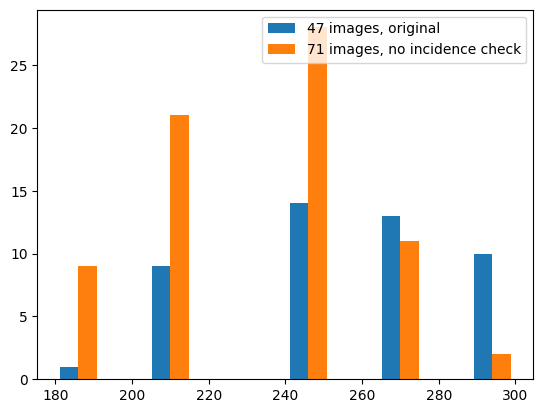

In [5]:

plt.hist([NPA['sol_lon'], NPA2['sol_lon']], label=['47 images, original', '71 images, no incidence check'])
plt.legend()

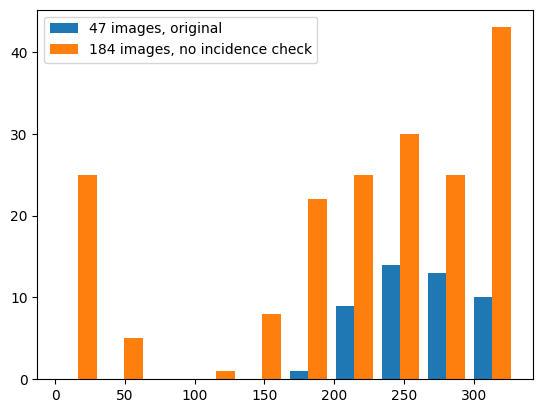

In [6]:
plt.hist([NPA['sol_lon'], NPA1['sol_lon']], label=['47 images, original', '184 images, no incidence check'])
plt.legend()

67


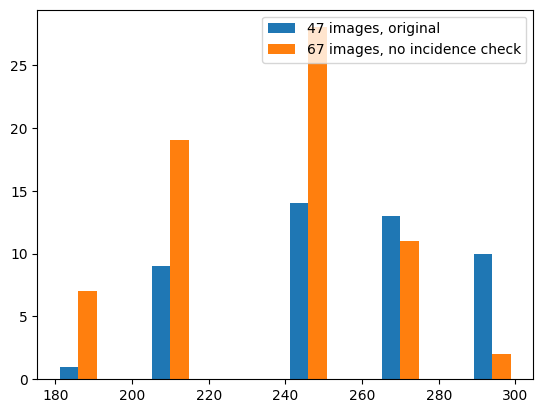

In [7]:
print(len(NPA3['sol_lon']))
plt.hist([NPA['sol_lon'], NPA3['sol_lon']], label=['47 images, original', '67 images, no incidence check'])
plt.legend()

In [8]:
 #make histogram of image pixel values for original NPA run
#get final selection image paths
selected_images = pd.read_csv('/home/tmckenna/nobackup/sfs_helper/examples/HLS/NPAb1/proc/tile_0/final_selection_0.csv')['img_name']
img_paths = [f"/home/tmckenna/nobackup/sfs_helper/examples/HLS/NPAb1/proc/tile_0/prj/ba_align/{img}_map.tif" for img in selected_images]

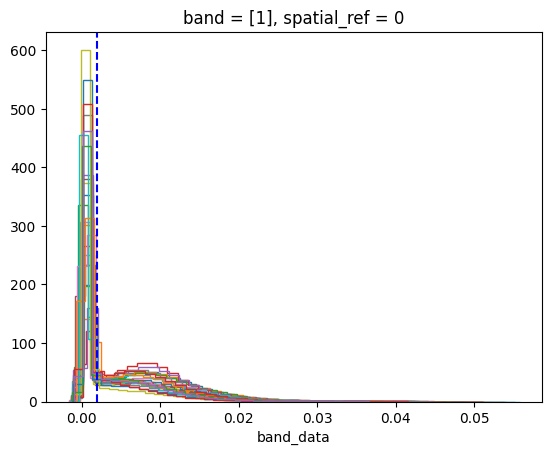

In [10]:
da = [xr.load_dataset(x) for x in img_paths]
data = {}
list = []
for i in range(len(img_paths)):
    imgid = img_paths[i].split('/')[-1].split('_map')[0]
    data[imgid] = xr.open_dataarray(img_paths[i])
    #list.append(data[imgid])
    data[imgid].plot.hist(histtype='step', density=True, bins=40)

plt.axvline(x = 0.002, color = 'b', linestyle='dashed', label='shadow threshold')


In [15]:
print(data[img_paths[i].split('/')[-1].split('_map')[0]])

<xarray.DataArray 'band_data' (band: 1, y: 842, x: 842)>
array([[[     nan,      nan, ...,      nan,      nan],
        [     nan, 0.000894, ..., 0.005909,      nan],
        ...,
        [     nan, 0.000579, ..., 0.010117,      nan],
        [     nan,      nan, ...,      nan,      nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -8.802e+04 -8.802e+04 ... -8.682e+04 -8.682e+04
  * y            (y) float64 2.99e+04 2.99e+04 2.99e+04 ... 2.87e+04 2.87e+04
    spatial_ref  int64 0
Attributes:
    ADJUSTMENT_QUATERNION:   0.99891045765972319,-0.02935720422130976,-0.0362...
    ADJUSTMENT_TRANSLATION:  4527.6567094258062,-3885.629199282077,-3976.5362...
    AREA_OR_POINT:           Area
    BUNDLE_ADJUST_PREFIX:    /home/tmckenna/nobackup/sfs_helper/examples/HLS/...
    CAMERA_MODEL_TYPE:       csm
    DEM_FILE:                /home/tmckenna/nobackup/sfs_helper/examples/HLS/...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


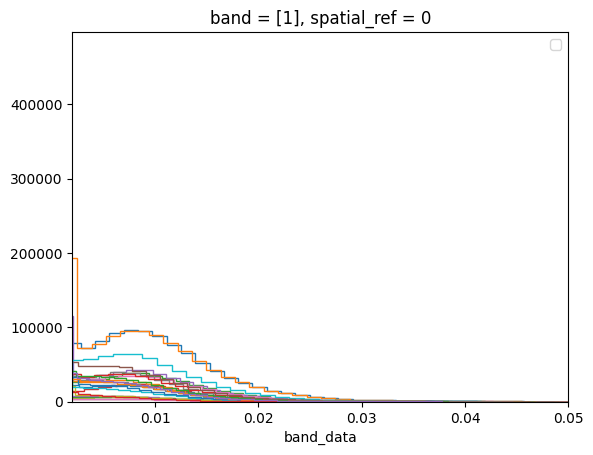

In [62]:

# hist_list = [da[i]['band_1'] for i in range(len(da))]
# #plt.hist(hist_list)
# da[15]['band_1'].plot.hist()
list = []
for i in range(len(da)):    
    img = selected_images[i]
    da[i]['band_data'].plot.hist(histtype='step', xlim=(0.002, 0.05), bins=40)
#plt.axvline(x = 0.002, color = 'b', linestyle='dashed', label='shadow threshold')
plt.legend()

In [2]:
#look at images removed by Stefano's filter to make sure they're shadowed
#read in csv data from rough selection and shadow removed selection
rough = pd.read_csv('/home/tmckenna/nobackup/sfs_helper/examples/HLS/NPAb1_test/proc/tile_0/rough_selection_0.csv')
no_shad = pd.read_csv('/home/tmckenna/nobackup/sfs_helper/examples/HLS/NPAb1_test/proc/tile_0/shad0.1_rough_sel_no-shadows_0.csv')

In [3]:
#make df with removed shadowed images
removed = rough.loc[~rough['img_name'].isin(no_shad.img_name.values)]
imgs = removed['img_name']
print(imgs)

5       M149952918RE
6       M149966495LE
7       M149966495RE
9       M152327649LE
10      M152327649RE
           ...      
179    M1262338302LE
180    M1262338302RE
181    M1262345348LE
182    M1262345348RE
183    M1274158095LE
Name: img_name, Length: 117, dtype: object


In [6]:
imgs.to_csv('/home/tmckenna/nobackup/sfs_helper/examples/HLS/NPAb1_test/proc/tile_0/removed_imgs.csv')

In [22]:
paths = np.array(['/home/tmckenna/nobackup/sfs_helper/examples/HLS/NPAb1_test/proc/tile_0/prj/1mpp/'+i+'_map.tif' for i in imgs.values])
print(paths)

['/home/tmckenna/nobackup/sfs_helper/examples/HLS/NPAb1_test/proc/tile_0/prj/1mpp/M149952918RE_map.tif'
 '/home/tmckenna/nobackup/sfs_helper/examples/HLS/NPAb1_test/proc/tile_0/prj/1mpp/M149966495LE_map.tif'
 '/home/tmckenna/nobackup/sfs_helper/examples/HLS/NPAb1_test/proc/tile_0/prj/1mpp/M149966495RE_map.tif'
 '/home/tmckenna/nobackup/sfs_helper/examples/HLS/NPAb1_test/proc/tile_0/prj/1mpp/M152327649LE_map.tif'
 '/home/tmckenna/nobackup/sfs_helper/examples/HLS/NPAb1_test/proc/tile_0/prj/1mpp/M152327649RE_map.tif'
 '/home/tmckenna/nobackup/sfs_helper/examples/HLS/NPAb1_test/proc/tile_0/prj/1mpp/M152341222LE_map.tif'
 '/home/tmckenna/nobackup/sfs_helper/examples/HLS/NPAb1_test/proc/tile_0/prj/1mpp/M154682375RE_map.tif'
 '/home/tmckenna/nobackup/sfs_helper/examples/HLS/NPAb1_test/proc/tile_0/prj/1mpp/M154689132RE_map.tif'
 '/home/tmckenna/nobackup/sfs_helper/examples/HLS/NPAb1_test/proc/tile_0/prj/1mpp/M154702741LE_map.tif'
 '/home/tmckenna/nobackup/sfs_helper/examples/HLS/NPAb1_test/pro